# Gaussian Mixture Model:

This programme utilises an EM algorithm to clusterise the mixture of Gaussians.
A few lines below show the theory behind this particular task.
Up until a certain moment I won't be using a particular function to depict a mixture, so that the theoretical results are more or less general. Later on I'll note where I should succumb to using Normal distribution for this case.

Let the mixture comprise of $K$ distributions $\varphi(x_i, \theta_k)$, where $x_i, \theta_k$ are the input data and a distribution parameters respectively. The total number of training data is $L$. In the mixture, each of the distributions has a weight $\omega_k$, thus the whole model is merely a weighted sum of all the densities.

Now we shall use Maximum Likelihood Estimation (MLE) to get the optimal parameters:
$$
L = \prod_{i=1}^{L} \sum_{k=1}^{K} \omega_k \varphi(x_i, \theta_k)
$$
Taking the logarithm of both sides, one obtains:
$$
l = \sum_{i=1}^{L} \log{\sum_{k=1}^{K} \omega_k \varphi(x_i, \theta_k)}
$$

Here's where we get the problem: usually we wouldn't have the summation under the log sign, but now we do. To overcome this obstacle, we would have to invent _latent variables_. But we haven't incorporated the fact that the weights of the distributions should sum to unity. This leads us to conditional optimisation where we shall make use of the Lagrange multipliers. 

The Lagrange function takes the form:
$$
\mathcal{L} = \sum_{i=1}^{L} \log{\sum_{k=1}^{K} \omega_k \varphi(x_i, \theta_k)} - \lambda\left(\sum_{k=1}^{K}\omega_k - 1\right) \tag{1}
$$
---
#### Parameter optimisation:

**Calculating the derivative of the Lagrange function w.r.t. $\omega_j$ and setting it equal to zero:**
$$
\frac{\partial \mathcal{L}}{\partial \omega_j} = \sum_{i=1}^{L} \frac{\varphi(x_i, \theta_j)}{\sum_{k=1}^{K} \omega_k \varphi(x_i, \theta_k)} - \lambda = 0
$$

Now, rearranging the terms of the equation and multiplying both sides by $\omega_j$ yields:
$$
\sum_{i=1}^{L} \frac{\omega_j\varphi(x_i, \theta_j)}{\sum_{k=1}^{K} \omega_k \varphi(x_i, \theta_k)} = \lambda \omega_j \tag{2}
$$

Notice that the indices $j$ on the LHS are independent of summation over $i$. Thus, we could sum both sides over $j$ and change the order of summation on the left to first sum over $j$ and then over $i$, i.e., we'd take:
$$
\sum_{j=1}^{K} \sum_{i=1}^{L} \frac{\omega_j\varphi(x_i, \theta_j)}{\sum_{k=1}^{K} \omega_k \varphi(x_i, \theta_k)} = \lambda \sum_{j=1}^{K} \omega_j
$$ 
and change it to:

$$
\sum_{i=1}^{L} \frac{\sum_{j=1}^{K} \omega_j\varphi(x_i, \theta_j)}{\sum_{k=1}^{K} \omega_k \varphi(x_i, \theta_k)} = \lambda \sum_{j=1}^{K} \omega_j
$$

It is only left to notice that the numerator and denominator on the LHS are the same, which results in summing unity $L$ times. The sum on the right also gives one since it should satisfy the weight constraint. Finally, we get:
$$
L = \lambda
$$

Now we should get back to the equation $(2)$. Deriving $\omega_j$ results in:
$$
\omega_j = \frac{1}{L}\sum_{i=1}^{L} \frac{\omega_j\varphi(x_i, \theta_j)}{\sum_{k=1}^{K} \omega_k \varphi(x_i, \theta_k)}
$$

Now we set the fraction under the sum to be the _latent variable_ $g_{ji}$ and proceed to understanding what this value represents. Notice that the equation 
$$
g_{ji}=\frac{\omega_j\varphi(x_i, \theta_j)}{\sum_{k=1}^{K} \omega_k \varphi(x_i, \theta_k)} \tag{3}
$$ 
looks very similar to the **Bayesian rule**: 
$$
\mathbb{p}(j|x_i)=\frac{\mathbb{p}(j)\mathbb{p}(x_i|j)}{\sum_{k=1}^{K} \mathbb{p}(k)\mathbb{p}(x_i|k)}
$$

This is how we're going to interpret all the input variables. $\mathbb{p}(j)=\omega_j$ is a prior distribution of mixtures or, equivalently, clusters. $\mathbb{p}(x_i|j)=\varphi(x_i, \theta_j)$ is likelyhood of $x_i$ to belong to the $j$-th cluster of the mixture. Finally, $\mathbb{p}(j|x_i) = g_{ji}$ is a (posterior) probability of ending up in $j$-th cluster after having observed the data $x_i$.

Now it comes to our understanding that 
$$\omega_j = \frac{1}{L}\sum_{i=1}^{L} \frac{\omega_j\varphi(x_i, \theta_j)}{\sum_{k=1}^{K} \omega_k \varphi(x_i, \theta_k)} = \frac{1}{L}\sum_{i=1}^{L} g_{ji}\tag{4}
$$
is nothing but the average probability of all observations to belong to the cluster $j$.
___
#### What is crucial to understand about latent variables is that once calculated, they are fixed. It is just our approximate _expectation_ of what latent variables should evaluate to.
___
**Calculating the derivative of the Lagrange function w.r.t. $\theta_j$ and setting it equal to zero:**
$$
\frac{\partial \mathcal{L}}{\partial \theta_j} = \sum_{i=1}^{L} \frac{\omega_j}{\sum_{k=1}^{K} \omega_k \varphi(x_i, \theta_k)}\frac{\partial \varphi(x_i, \theta_j)}{\partial \theta_j} = 0
$$

Notice that the first factor under the sum is almost $g_{ji}$. Let us multiply and divice the factor by $\varphi(x_i, \theta_j)$ to complete the $g_{ji}$ definition. This should take us to:
$$
\sum_{i=1}^{L} \frac{\omega_j \varphi(x_i, \theta_j)}{\sum_{k=1}^{K} \omega_k \varphi(x_i, \theta_k)}\frac{1}{\varphi(x_i, \theta_j)}\frac{\partial \varphi(x_i, \theta_j)}{\partial \theta_j} = \sum_{i=1}^{L} g_{ji} \frac{1}{\varphi(x_i, \theta_j)}\frac{\partial \varphi(x_i, \theta_j)}{\partial \theta_j} = 0
$$

The final notice is that what's left under the sum, other than $g_{ji}$, is the log-derivative of $\varphi$. Hence:
$$
\sum_{i=1}^{L} g_{ji} \frac{\partial \log{\varphi(x_i, \theta_j)}}{\partial \theta_j} = 0
$$
or, equivalently, making use of the fact that latent variables have been calculated and are fixed, we can take the derivative out of the sum:
$$
\frac{\partial}{\partial \theta_j} \sum_{i=1}^{L} g_{ji}  \log{\varphi(x_i, \theta_j)} = 0 \tag{5}
$$
___
#### This is how, when having approximated the latent variables (posterior probabilities), one _maximises_ the mixture distribution over data.
___
> **It has become clear what we shall do now. The EM algorithm:** 
> 1. Initialise $K$ weights and the parameters $\theta_k$ of the distribution;
> 2. Evaluate the latent variables $g_{ji}$ according to (3);
> 3. Update $\theta$'s by solving (5);
> 4. Update weights $\omega$, using (4).
> 5. Iterate until convergence.

## Deriving EM for Gaussian Mixture:
#### Understanding the problem:

We would like to clusterise data based on the geometry of the input. Thus, each input is a vector from $\mathbb{R}^n$. Assuming that all data points are independently drawn from corresponding distribution, we might use the following likelyhood of $i$-th input to belong to cluster $j$:
$$
\mathbb{p}(x_i|j)=\varphi(x_i, j)=\mathcal{N}(x_i, \theta_j)
$$

> **For clarity:** \
> $x_{i}$ is the $i$-th observation; \
> $\theta_{j}$ are the parameters of $j$-th cluster;

We know how to calculate $g_{ji}$ and $\omega_j$. All that's left is to learn the update rule for $\theta$'s. It hasn't been mentioned yet, but in this particular case of GMM, $\theta_j$ resembles the means and covariance matrices of clusters. 

Let us proceed to calculating the new $\theta$'s:  
$$
\sum_{i=1}^{L} g_{ji} \frac{\partial \log{\varphi(x_i, \theta_j)}}{\partial \theta_j} = 0
$$

Calculating the log of a mixture component:
$$
\log{\varphi(x_i, \theta_j)} = \log{\mathcal{N}(x_i, \theta_j)}
= C_0 + \frac{1}{2}\log{|{\Sigma}|^{-1}} - \frac{1}{2} (x-\mu)^{T}\Sigma^{-1}(x-\mu)
$$

First, let's derive the update rule for $\mu_j$. Technically, I should put index $j$ to both $\mu$ and $\Sigma$, but as I'm stating this outright, just keep that in mind:
$$
\frac{\partial \log{\varphi(x_i, \theta_j)}}{\partial \mu_j} = -{\Sigma}^{-1}(x-\mu) \Leftrightarrow 
\sum_{i=1}^{L} g_{ji} \frac{\partial \log{\varphi(x_i, \theta_j)}}{\partial \theta_j} = -\sum_{i=1}^{L} g_{ji} \Sigma^{-1}(x-\mu) = 0 \\
$$
Here, $\Sigma^{-1}$ is independent of summation so we can multiply both sides of the equation by $\Sigma$ and obtain:
$$
\frac{\partial \log{\varphi(x_i, \theta_j)}}{\partial \mu_j} = \sum_{i=1}^{L} g_{ji} (x-\mu) = 0 \Rightarrow \\
\mu_j = \frac{\sum_{i=1}^{L} g_{ji} x}{\sum_{i=1}^{L} g_{ji}} 
$$

**`This yields a very familiar result, actually. Recall that in typical MLE-estimation one gets the average of all data points for Gaussian variables. Here, we get almost the same result, only weighted by the probabilities of an entry to belong to that particular cluster.`**

Following the same optimisation routine (only optimising $\Sigma^{-1}$ since it's more straightforward), the equation yields:
$$
\Sigma_j = \frac{\sum_{i=1}^{L} g_{ji} (x-\mu)(x-\mu)^{T}}{\sum_{i=1}^{L} g_{ji}} 
$$

In [1]:
import numpy as np 
import scipy.stats as st

import pandas as pd

from functools import reduce

import matplotlib.pyplot as plt
plt.style.use('default')

In [2]:
class GaussianMixtureModel():
    def __init__(self, data, num_clusters):
        
        self.X   = data
        self.N   = np.shape(data)[0]
        self.dim = np.shape(data)[1]
        self.K   = num_clusters
        self.NLL = np.inf
        
        self.values = np.zeros(shape=(self.K, self.N))
        
        ## initialising parameters of distributions:
        self.weights = self._init_weights()
        self.G       = self._init_g_probs()
        
        self.mus      = np.zeros(shape=(self.K, self.dim, 1)) 
        self.sigmas   = np.zeros(shape=(self.K, self.dim, self.dim))
    
    def _init_weights(self):
        
        self.weights = np.random.randint(low=5, high=30, size=self.K).reshape((-1, 1))
        return self.weights / self.weights.sum()
        
    def _init_g_probs(self):
        
        self.G = np.random.randint(low=5, high=30, size=(self.K, self.N))
        return self.G / self.G.sum(axis=0)
        
    def _update_weights(self):
        
        self.weights = 1/self.N * np.sum(self.G, axis=1, keepdims=True)
        
    def _update_g_probs(self):
                
        for idx, (mu, sigma) in enumerate(zip(self.mus, self.sigmas)):
            self.values[idx, :] = st.multivariate_normal(mu, sigma).logpdf(self.X) 
        
        self.values = self.values + np.log(self.weights)
        self.G = np.exp(self.values - reduce(np.logaddexp, self.values))
        
    def _update_mus(self):
        
        self.mus = ((self.G @ self.X) / (self.N * self.weights))
        
    def _update_sigmas(self):
        
        for idx, mu in enumerate(self.mus):
            self.sigmas[idx, :] = ((self.X - mu) * self.G[idx, :, np.newaxis]).T @ (self.X - mu) /\
                                   (self.N * self.weights[idx])
    def _update_NLL(self):
        
        self.NLL = -sum(reduce(np.logaddexp, self.values))
                
    def _expectation_step(self):
        
        self._update_g_probs()
        self._update_weights()
        
    def _maximisation_step(self):
        
        self._update_mus()
        self._update_sigmas()
    
    
    def fit(self):
        
        self.losses = []
        counter = 0
        old_nll = self.NLL
        
        ## calculating mus and sigmas to update the first NLL-value:
        self._update_mus()
        self._update_sigmas()

        self._update_NLL()
        
        while abs(old_nll - self.NLL) > 1e-6:
    
            counter += 1
            old_nll = self.NLL
            
            self._expectation_step()
            self._maximisation_step()
            self._update_NLL()
            self.losses.append(self.NLL)
            
            if counter % 500 == 0:
                print(f'+++ Iteration #{counter}; NLL = {self.NLL:4f}')
            
    def score(self, test_x):
        
        values = np.zeros((self.K, len(test_x)))
        
        for idx, (mu, sigma) in enumerate(zip(self.mus, self.sigmas)):
            values[idx, :] = st.multivariate_normal(mu, sigma).logpdf(test_x) 
        
        values = values + np.log(self.weights)
        values = np.exp(reduce(np.logaddexp, values))
        
        return values
    
    def predict_cluster(self, test_x):
        
        values = np.zeros((self.K, len(test_x)))
        
        for idx, (mu, sigma) in enumerate(zip(self.mus, self.sigmas)):
            values[idx, :] = st.multivariate_normal(mu, sigma).logpdf(test_x) 
        
        values = values + np.log(self.weights)

        return np.argmax(values, axis=0)

In [75]:
## generating data for GMM:
size = 500
K = 3
grp_dict = {}

for grp in range(K):
    grp_dict['grp'+str(grp)] = {}
    mean  = 10*(2*np.random.random(2)-1)
    sigma = st.wishart(df=3, scale=np.eye(2)).rvs()
    
    grp_dict['grp'+str(grp)]['values'] = np.random.multivariate_normal(mean=mean, cov=sigma, size=size)
    grp_dict['grp'+str(grp)]['mean']  = mean
    grp_dict['grp'+str(grp)]['sigma'] = sigma

mus = np.vstack([grp['mean'] for grp in grp_dict.values()])
sigmas = np.vstack([grp['sigma'] for grp in grp_dict.values()])

train_size = int(0.8 * size)

train = [grp['values'][:train_size] for grp in grp_dict.values()]
test  = [grp['values'][train_size:] for grp in grp_dict.values()]

## getting it all together:
df = pd.DataFrame()

for set_, name in zip([train, test], ['train', 'test']):
    for idx, rows in enumerate(set_):
        df = pd.concat([df,
                        pd.DataFrame({
                            'set': name,
                            'x1': [x[0] for x in rows],
                            'x2': [x[1] for x in rows],
                            'true label': idx
                            })])
        
df.groupby('set').agg('count')

train = df[df['set'] == 'train'][['x1', 'x2']].values
test  = df[df['set'] != 'train'][['x1', 'x2']].values

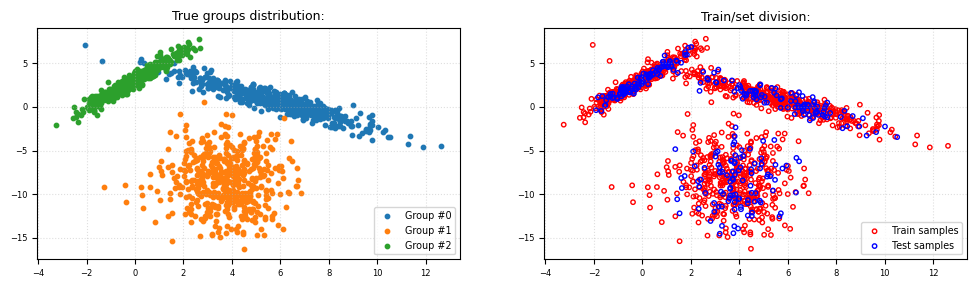

In [76]:
fig, axs = plt.subplots(1, 2, figsize=(12, 3))

for grp in range(K):
    data = df[df['true label'] == grp]
    axs[0].scatter(data['x1'], data['x2'], s=10, label=f'Group #{grp}')
    
for set_, color in zip(['train', 'test'], ['red', 'blue']):
    axs[1].scatter(df[df['set'] == set_]['x1'], 
                   df[df['set'] == set_]['x2'],
                   facecolor='None', edgecolor=color,
                   label=f'{set_.capitalize()} samples', s=10)


for ax, title in zip(axs, ['True groups distribution:', 'Train/set division:']):
    
    ax.set_title(title, fontsize=9)
    ax.grid(ls=':', alpha=.4)
    ax.legend(fontsize='x-small', loc=4)
    ax.xaxis.set_tick_params(labelsize=6); ax.yaxis.set_tick_params(labelsize=6);

Actual means:	|	Calculated means:
[5.66 0.83]	|	[5.66 0.78]
[ 3.78 -8.6 ]	|	[ 3.71 -8.45]
[-0.2  2.8]	|	[-0.14  2.87]


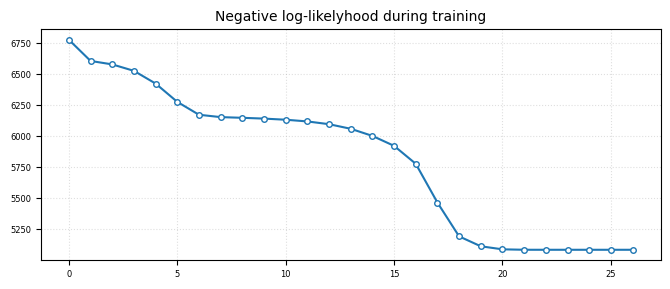

In [93]:
gmm = GaussianMixtureModel(train, 3)
gmm.fit()

df['pred label'] = gmm.predict_cluster(np.r_[train, test])

plt.figure(figsize=(8, 3))
plt.plot(gmm.losses, marker='o', markersize=4, markerfacecolor='white')
plt.grid(ls=':', alpha=.4)
plt.xticks(size=6); plt.yticks(size=6);
plt.title('Negative log-likelyhood during training', fontsize=10);

print('Actual means:\t|\tCalculated means:' )
for mu1, mu2 in zip(mus, gmm.mus):
    print(np.round(mu1, 2), np.round(mu2, 2), sep='\t|\t')

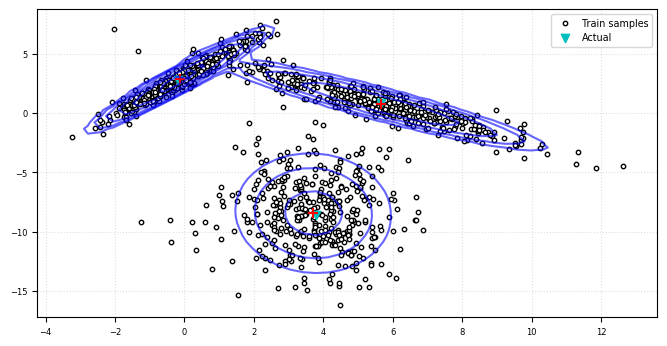

In [80]:
fig = plt.figure(figsize=(8, 4))

xx = np.linspace(np.min(train[:, 0])-1, np.max(train[:, 0])+1)
yy = np.linspace(np.min(train[:, 1])-1, np.max(train[:, 1])+1)
X, Y = np.meshgrid(xx, yy) 
XY   = np.array([X.ravel(), Y.ravel()]).T

plt.contour(X, Y, gmm.score(XY).reshape(len(X), len(Y)), colors=['blue'],levels=np.logspace(-2.5, 0, 10), alpha=.6)
    
plt.scatter(train[:, 0], train[:, 1], facecolor='white', edgecolor='black', label='Train samples', s=10)
plt.scatter(mus[:, 0], mus[:, 1], marker='v', color='c', label='Actual')
plt.scatter(gmm.mus[:, 0], gmm.mus[:, 1], marker='+', color='red', s=60)

plt.grid(ls=':', alpha=.4)
plt.legend(fontsize='x-small')
plt.xticks(size=6); plt.yticks(size=6);

### `Visualising misclustered points from both training and test sets:`

`1. I should note here that this thing only works properly when the order of 'actual' clusters coincides with that defined by algorithm. I know it could be tuned (sorting and stuff), but it doesn't seem that necessary.`

`2. This also must explain why I had mu's printed in the cell with the fit. I just re-ran the algorithm until it yielded the same order.`

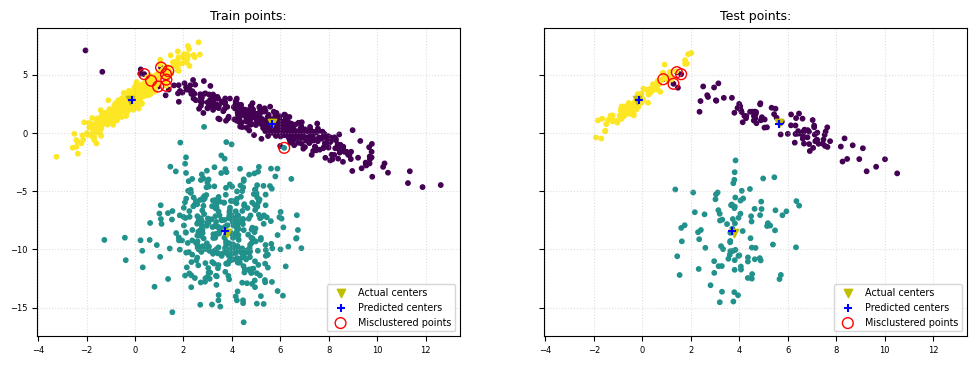

In [94]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True)

for ax, set_ in zip(axs, ['train', 'test']):
    
    entries = df.query('set == @set_')
    ax.scatter(entries['x1'], entries['x2'], c=entries['true label'], s=10)
    ax.scatter(mus[:, 0], mus[:, 1], marker='v', color='y', label='Actual centers')
    ax.scatter(gmm.mus[:, 0], gmm.mus[:, 1], marker='+', color='blue', label='Predicted centers')

    entries = entries[entries['true label'] != entries['pred label']]
    ax.scatter(entries['x1'], entries['x2'], label='Misclustered points',
               s=60, marker='o', facecolor='None', edgecolor='red')
    
    ax.set_title(set_.capitalize() + ' points:', fontsize=9)
    ax.grid(ls=':', alpha=.4)
    ax.legend(fontsize='x-small', loc=4)
    ax.xaxis.set_tick_params(labelsize=6); ax.yaxis.set_tick_params(labelsize=6);